# Data on Indian Startups 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px

In [3]:
import datetime

In [4]:
df = pd.read_csv("./startup_funding.csv")
df.columns = ["S.No", "Date", "StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName","InvestmentType", "AmountinUSD", "Remarks"]

In [5]:
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")

In [6]:
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName","InvestmentType", "AmountinUSD", "Remarks" ]:
    df[col] = df[col].apply(lambda x:clean_string(x))

df.head()

,S.No,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountinUSD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000",nan
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000",nan
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000",nan
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000",nan
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000",nan


In [7]:
print(df["Date"].head())
df['Date'][df['Date']=='05/072018'] = '05/07/2018'
df['Date'][df['Date']=='01/07/015'] = '01/07/2015'
df['Date'][df['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
df['Date'][df['Date']=='12/05.2015'] = '12/05/2015'
df['Date'][df['Date']=='13/04.2015'] = '13/04/2015'
df['Date'][df['Date']=='15/01.2015'] = '15/01/2015'
df['Date'][df['Date']=='22/01//2015'] = '22/01/2015'

0    05/09/2019
1    04/09/2019
2    04/09/2019
3    04/09/2019
4    04/09/2019
Name: Date, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from 

In [8]:
df["year"] = pd.to_datetime(df["Date"], format = "%d/%m/%Y").dt.year

In [9]:
df["year"].head()

0    2019
1    2019
2    2019
3    2019
4    2019
Name: year, dtype: int64

In [10]:
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

In [11]:
df["yearmonth"].head()

0    201909
1    201909
2    201909
3    201909
4    201909
Name: yearmonth, dtype: int64

In [12]:
cnt_srs = df["year"].value_counts()

In [13]:
cnt_srs = cnt_srs.sort_index()

In [14]:
cnt_srs.head()

2015    936
2016    993
2017    687
2018    310
2019     83
Name: year, dtype: int64

In [15]:
trace = go.Bar(
        x = cnt_srs.index,
        y = cnt_srs.values,
        marker = dict(
                color = "RED"
        ),
)

In [16]:
data = [trace]
data

[Bar({
     'marker': {'color': 'RED'},
     'x': array([2015, 2016, 2017, 2018, 2019], dtype=int64),
     'y': array([936, 993, 687, 310,  83], dtype=int64)
 })]

In [17]:
layout = go.Layout(
         title = go.layout.Title(
                 text = "Number of funding deals over years",
                 x = 0.5),
         font = dict(size = 14),
         width = 800,
         height = 400,
)

In [18]:
layout

Layout({
    'font': {'size': 14}, 'height': 400, 'title': {'text': 'Number of funding deals over years', 'x': 0.5}, 'width': 800
})

In [19]:
fig = go.Figure(data = data, layout = layout)

In [20]:
fig

In [21]:
df["yearmonth"] = pd.to_datetime(df["Date"], format = '%d/%m/%Y').apply(lambda x:datetime.date(x.year, x.month, 1))

In [22]:
df["yearmonth"].head()

0    2019-09-01
1    2019-09-01
2    2019-09-01
3    2019-09-01
4    2019-09-01
Name: yearmonth, dtype: object

In [23]:
cnt_srs = df["yearmonth"].value_counts()
cnt_srs.head()

2016-01-01    104
2016-02-01    100
2015-07-01     98
2015-08-01     98
2016-06-01     98
Name: yearmonth, dtype: int64

In [24]:
cnt_srs = cnt_srs.sort_index()

In [25]:
trace = go.Scatter(
        x = cnt_srs.index.astype(str),
        y = cnt_srs.values,
        marker = dict(
                color = "BLUE"
        ),
)

In [26]:
trace

Scatter({
    'marker': {'color': 'BLUE'},
    'x': array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
                '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
                '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
                '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
                '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
                '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
                '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
                '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
                '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
                '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01', '2019-02-01',
                '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
           

In [27]:
layout = go.Layout(
        title = go.layout.Title(
                text = "Funding deals over Years",
                x = 0.5
        ),
        font = dict(size = 14),
        width = 800,
        height = 500
)

In [28]:
data = [trace]

In [29]:
layout

Layout({
    'font': {'size': 14}, 'height': 500, 'title': {'text': 'Funding deals over Years', 'x': 0.5}, 'width': 800
})

In [30]:
fig = go.Figure(data = data, layout = layout)

In [31]:
fig

In [32]:
df["AmountinUSD"].tail()

3004    4,500,000
3005      825,000
3006    1,500,000
3007          nan
3008      140,000
Name: AmountinUSD, dtype: object

In [33]:
def clean_amount(x):
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a", "")
    if(x == ''):
        x = '-999'
    return x    

In [34]:
df["CleanedAmount"] = df["AmountinUSD"].apply(lambda x: float(clean_amount(x)))

In [35]:
AmountinUSD= df["CleanedAmount"]

In [36]:
AmountinUSD.head()

0     4500000.0
1     3300000.0
2     6000000.0
3     5000000.0
4    18000000.0
Name: CleanedAmount, dtype: float64

In [37]:
AmountinUSD = AmountinUSD[~np.isnan(AmountinUSD)]

In [38]:
AmountinUSD.head()

0     4500000.0
1     3300000.0
2     6000000.0
3     5000000.0
4    18000000.0
Name: CleanedAmount, dtype: float64

In [39]:
AmountinUSD = AmountinUSD[AmountinUSD != -999]

In [40]:
AmountinUSD.head()

0     4500000.0
1     3300000.0
2     6000000.0
3     5000000.0
4    18000000.0
Name: CleanedAmount, dtype: float64

In [41]:
df.iloc[df["CleanedAmount"].sort_values(ascending=False).index[:5]]

,S.No,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountinUSD,Remarks,year,yearmonth,CleanedAmount
25,26,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,"3,900,000,000",nan,2019,2019-08-01,3.900000e+09
616,618,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,500,000,000",nan,2017,2017-08-01,2.500000e+09
795,799,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,400,000,000",nan,2017,2017-05-01,1.400000e+09
931,940,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,400,000,000",nan,2017,2017-03-01,1.400000e+09
2613,2654,28/7/2015,Flipkart.com,Online Marketplace,nan,Bangalore,Steadview Capital and existing investors,Private Equity,"700,000,000","Late Stage, 10th Round More here",2015,2015-07-01,7.000000e+08


In [42]:
plt.figure(figsize = (12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Distribution of funding by investors')

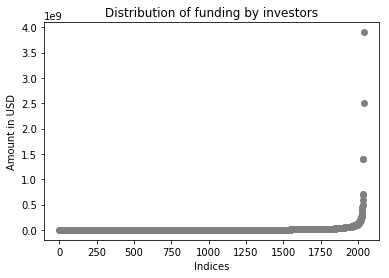

In [43]:
plt.scatter(range(len(AmountinUSD)), np.sort(AmountinUSD.values), color = "GREY")
plt.xlabel( "Indices")
plt.ylabel("Amount in USD")
plt.title("Distribution of funding by investors")

In [44]:
df["CleanedAmount"][df["CleanedAmount"]==3900000000] = 50000000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [45]:
df.iloc[df["CleanedAmount"].sort_values(ascending=False).index[:5]]

,S.No,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountinUSD,Remarks,year,yearmonth,CleanedAmount
616,618,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,500,000,000",nan,2017,2017-08-01,2.500000e+09
795,799,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,400,000,000",nan,2017,2017-05-01,1.400000e+09
931,940,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,400,000,000",nan,2017,2017-03-01,1.400000e+09
2613,2654,28/7/2015,Flipkart.com,Online Marketplace,nan,Bangalore,Steadview Capital and existing investors,Private Equity,"700,000,000","Late Stage, 10th Round More here",2015,2015-07-01,7.000000e+08
2424,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,"680,000,000",Late Stage (Alibaba @ 40% equity),2015,2015-09-01,6.800000e+08


In [46]:
cnt_df = df.groupby('year')['CleanedAmount'].agg(['sum', 'mean'])

In [47]:
cnt_df

,sum,mean
year,,
2015,8.673018e+09,1.318088e+07
2016,3.828089e+09,6.532574e+06
2017,1.042931e+10,2.287129e+07
2018,5.122367e+09,1.925702e+07
2019,2.681217e+09,3.230382e+07


In [48]:
cnt_srs = cnt_df['sum']
cnt_srs

year
2015    8.673018e+09
2016    3.828089e+09
2017    1.042931e+10
2018    5.122367e+09
2019    2.681217e+09
Name: sum, dtype: float64

In [49]:
cnt_srs = cnt_srs.sort_index()
cnt_srs

year
2015    8.673018e+09
2016    3.828089e+09
2017    1.042931e+10
2018    5.122367e+09
2019    2.681217e+09
Name: sum, dtype: float64

In [50]:
trace = go.Bar(
        x = cnt_srs.index,
        y = cnt_srs.values,
        marker = dict(
                color = "BLUE"
        ),
)

In [51]:
layout = go.Layout(
        title = go.layout.Title(
                text = "Sum of funds in each year",
                x = 0.5
        ),
        font = dict(size = 14),
        width = 800,
        height = 400

)

In [52]:
data = [trace]
data

[Bar({
     'marker': {'color': 'BLUE'},
     'x': array([2015, 2016, 2017, 2018, 2019], dtype=int64),
     'y': array([8.67301837e+09, 3.82808861e+09, 1.04293097e+10, 5.12236737e+09,
                 2.68121727e+09])
 })]

In [53]:
layout

Layout({
    'font': {'size': 14}, 'height': 400, 'title': {'text': 'Sum of funds in each year', 'x': 0.5}, 'width': 800
})

In [54]:
fig = go.Figure(data = data, layout = layout)
fig

In [55]:
import re
import string

In [57]:
df["InvestmentType"].head()

0            Maiden Round
1                Series A
2    Private Equity Round
3            pre-series A
4                Series A
Name: InvestmentType, dtype: object

In [58]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [59]:
df["InvestmentType"] = df["InvestmentType"].apply(lambda x: remove_punctuation(str(x)))

In [60]:
df["InvestmentType"].head()

0            Maiden Round
1                Series A
2    Private Equity Round
3             preseries A
4                Series A
Name: InvestmentType, dtype: object

In [61]:
funding_map = {
    "SeedAngel Funding": "Seed Angel Funding",
    "SeedFunding": "Seed Funding",
    "PrivateEquity": "Private Equity",
    "Crowd funding": "Crowd Funding",
    "Angel  Seed Funding": "Seed Angel Funding",
    "Seed  Angel Funding": "Seed Angel Funding",
    "Seed Angle Funding": "Seed Angel Funding",
    "Seed  Angle Funding": "Seed Angel Funding",
    "SeednFunding": "Seed Funding",
    "Seed funding": "Seed Funding",
    "Seed Round": "Seed Funding",
    "preSeries A": "PreSeries A",
    "preseries A": "PreSeries A",
    "Pre Series A": "PreSeries A"
}

In [63]:
for i, v in funding_map.items():
    df['InvestmentType'][df['InvestmentType'] == i] = v
df['InvestmentType']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0               Maiden Round
1                   Series A
2       Private Equity Round
3                PreSeries A
4                   Series A
5                       Seed
6                   Series A
7                   Series C
8                   Series A
9                   Series C
10                  Series A
11        Seed Funding Round
12            Single Venture
13           Corporate Round
14                  Series D
15                  Series D
16                  Series C
17                  Series B
18              Seed Funding
19                  Series D
20             Venture Round
21                  Series C
22              Seed Funding
23                  Series A
24                  Series F
25                  Series B
26                  Series B
27               PreSeries A
28                     Angel
29                  Series J
                ...         
2979            Seed Funding
2980            Seed Funding
2981            Seed Funding
2982          

In [72]:
cnt_srs = df['InvestmentType'].value_counts()[:10]

In [73]:
cnt_srs

Seed Funding          1388
Private Equity        1357
Seed Angel Funding     141
Debt Funding            22
Series A                22
Series B                15
Series C                11
Series D                 9
PreSeries A              8
nan                      3
Name: InvestmentType, dtype: int64

In [113]:
def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x = srs.values[::-1],
        y = srs.index[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
                color = color
        )
    )
    return trace

In [114]:
layout = go.Layout(
         title = go.layout.Title(
                 text = "Count on Investment Types ",
                 x = 0.5
         ),
         font = dict(size = 14),
         width = 800,
         height = 600
)

In [115]:
data = [horizontal_bar_chart(cnt_srs, "RED")]
fig = go.Figure(data = data, layout = layout)

In [116]:
fig

In [117]:
cnt_df = df.groupby('InvestmentType')['CleanedAmount'].agg(['size', 'sum', 'mean'])

In [118]:
cnt_df.head()

,size,sum,mean
InvestmentType,,,
Angel,1,145000.0,145000.0
Angel Funding,1,0.0,NaN
Angel Round,1,319605.0,319605.0
Bridge Round,1,-999.0,-999.0
Corporate Round,1,38080000.0,38080000.0


In [119]:
cnt_df = cnt_df.sort_values(by = 'size', ascending = False)

In [120]:
cnt_df.head()

,size,sum,mean
InvestmentType,,,
Seed Funding,1388,5.006159e+08,6.701686e+05
Private Equity,1357,2.672787e+10,2.493271e+07
Seed Angel Funding,141,2.256960e+08,2.051782e+06
Series A,22,1.881980e+08,8.554455e+06
Debt Funding,22,1.016091e+08,4.838528e+06


In [121]:
cnt_df = cnt_df.iloc[:10,:]

In [122]:
cnt_df

,size,sum,mean
InvestmentType,,,
Seed Funding,1388,5.006159e+08,6.701686e+05
Private Equity,1357,2.672787e+10,2.493271e+07
Seed Angel Funding,141,2.256960e+08,2.051782e+06
Series A,22,1.881980e+08,8.554455e+06
Debt Funding,22,1.016091e+08,4.838528e+06
Series B,15,6.195509e+08,4.130339e+07
Series C,11,8.896700e+08,8.087909e+07
Series D,9,7.817990e+08,8.686656e+07
PreSeries A,8,4.137100e+07,5.171375e+06


In [123]:
cnt_srs = cnt_df["sum"]

In [124]:
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]

In [125]:
cnt_srs

InvestmentType
Seed Funding          5.006159e+08
Seed Angel Funding    2.256960e+08
PreSeries A           4.137100e+07
Series A              1.881980e+08
Series B              6.195509e+08
Series C              8.896700e+08
Series D              7.817990e+08
Private Equity        2.672787e+10
Name: sum, dtype: float64

In [126]:
layout = go.Layout(
        title = go.layout.Title(
                text = "Sum of investment amount by investment type",
                x = 0.5
        ),
        font = dict(size = 14),
        width = 800,
        height = 600
)

In [127]:
layout

Layout({
    'font': {'size': 14},
    'height': 600,
    'title': {'text': 'Sum of investment amount by investment type', 'x': 0.5},
    'width': 800
})

In [128]:
data = [horizontal_bar_chart(cnt_srs, "RED")]

In [129]:
fig = go.Figure(data = data, layout = layout)

In [130]:
fig

In [131]:
location_map = {
    "Bengaluru": "Bangalore",
    "Delhi": "NCR",
    "New Delhi": "NCR",
    "Gurugram": "NCR",
    "Gurgaon": "NCR",
    "Noida": "NCR"
}

In [132]:
for i, v in location_map.items():
    df['City'][df['City'] == i] = v


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [134]:
def horizontal_bar_chart(srs, color):
    trace = go.Bar(
            x = srs.values[::-1],
            y = srs.index[::-1],
            showlegend = False,
            orientation = 'h',
            marker = dict(
                    color = color
            )
    )
    return trace

In [135]:
cnt_srs = df['City'].value_counts()[:14]

In [136]:
cnt_srs

NCR           878
Bangalore     833
Mumbai        565
nan           180
Pune          103
Hyderabad      99
Chennai        96
Ahmedabad      38
Jaipur         30
Kolkata        21
Indore         13
Chandigarh     11
Vadodara       10
Goa            10
Name: City, dtype: int64

In [139]:
layout = go.Layout(
        title = go.layout.Title(
                text = "Number of deals across cities",
                x = 0.5
        ),
        font = dict(size = 14),
        width = 800,
        height = 600
)

In [140]:
data = [horizontal_bar_chart(cnt_srs, "RED")]

In [141]:
data

[Bar({
     'marker': {'color': 'RED'},
     'orientation': 'h',
     'showlegend': False,
     'x': array([ 10,  10,  11,  13,  21,  30,  38,  96,  99, 103, 180, 565, 833, 878],
                dtype=int64),
     'y': array(['Goa', 'Vadodara', 'Chandigarh', 'Indore', 'Kolkata', 'Jaipur',
                 'Ahmedabad', 'Chennai', 'Hyderabad', 'Pune', 'nan', 'Mumbai',
                 'Bangalore', 'NCR'], dtype=object)
 })]

In [142]:
fig = go.Figure(data = data, layout = layout)

In [143]:
fig